In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [95]:
df = pd.read_csv('logs2.log', sep=';')
df.loc[df['pods'] == 0.0, 'pods'] = np.nan
df = df[df['pods'].notna()]

print(df.head())
print(len(df))

               timestamp                           node  renewable_share  \
0   2021/10/14 10:15:26   ip-172-20-49-155.ec2.internal           2176.0   
5   2021/10/14 10:16:26   ip-172-20-49-155.ec2.internal           2487.8   
7   2021/10/14 10:17:26   ip-172-20-49-155.ec2.internal           3896.6   
10  2021/10/14 10:18:26   ip-172-20-49-155.ec2.internal           8404.3   
14  2021/10/14 10:19:26   ip-172-20-49-155.ec2.internal           8029.2   

    score  pods  
0      10   1.0  
5      10   1.0  
7      10   1.0  
10     10   1.0  
14     10   1.0  
144


In [96]:

index = pd.date_range(start = "2020-06-01 00:00", end = "2020-06-01 23:50", freq = "10min")
index = [pd.to_datetime(date, format='%Y-%m-%d %H:%M') for date in index]

df['timestamp'] =  index

df = df.set_index('timestamp')
df.drop(['renewable_share', 'score'], axis=1, inplace=True)
print(len(df))
print(df.head(20))

144
                                              node  pods
timestamp                                               
2020-06-01 00:00:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 00:10:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 00:20:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 00:30:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 00:40:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 00:50:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:00:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:10:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:20:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:30:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:40:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 01:50:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 02:00:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 02:10:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 02:20:00  ip-172-20-49-155.ec2.internal   1.0
2020-06-01 02:30:00  ip-172

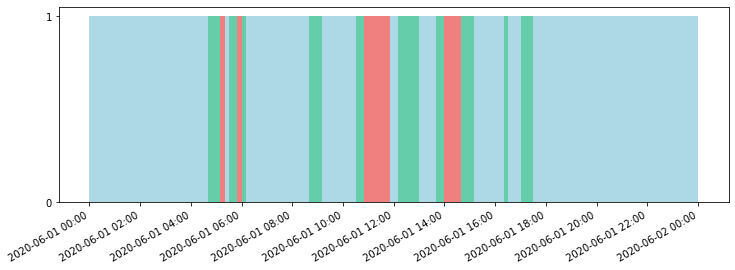

In [97]:
col = []
for val in df['node']:
    if val == 'ip-172-20-49-155.ec2.internal':
        col.append('lightblue')
    elif val == 'ip-172-20-58-122.ec2.internal':
        col.append('lightcoral')
    else:
        col.append('mediumaquamarine')
        

fig = plt.figure(figsize=(12,4))
plt.yticks(np.arange(0, 2, step=1))
plt.bar(df.index, df['pods'], color = col, width=0.007, align='edge')

# set monthly locator
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
# set formatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gcf().autofmt_xdate()

plt.show()

